# THE SPARKS FOUNDATION

# Data Science & Business Analytics Internship - JAN21

# Author : DIPTIRTHA CHATTERJEE

# TASK 2: Prediction Using Unsupervised ML

Query: Predict the optimum number of clusters from the given Dataset and represent it visually.

# 1. Data Transformation

In [1]:
#Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

In [2]:
#Read the data 
Data = pd.read_csv("Iris.csv")
Data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Checking the Data structure
Data.shape

(150, 6)

In [4]:
Data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
#Checking for Missing Values
Data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

This proves that there is no missing values in the Dataset. So, Data Cleaning is not required!

# 2. Clustering

In [7]:
#Loading required variables in a DataFrame for Clustering
Iris = Data.iloc[:,1:5]
Iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
# Checking the WCSS (Within Cluster Sum of Squares)
wcss = []

for i in range(1,8):
    kmeans = KMeans(i)
    kmeans.fit(Iris)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss    

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.535582051282034,
 38.930963049671746,
 34.32508172302736]

# 3. Plot Elbow Graph

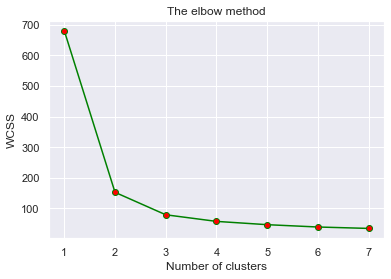

In [14]:
#The Elbow Method
plt.plot(range(1,8),wcss,color='green',marker='o',markerfacecolor='red')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')#within cluster sum of spares
plt.show()

From the plot, we can see that k=3 will be the optimum number of Cluster for this given Dataset.

# 4. Cluster Table

In [10]:
kmeans = KMeans(3, random_state = 1)
kmeans.fit(Iris)

KMeans(n_clusters=3, random_state=1)

In [11]:
# Creating a summary table

cluster_table = Data.iloc[:,1:6]
cluster_table['Cluster'] = kmeans.fit_predict(Iris)
cluster_table

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


# 5. Data Visualization

[Text(0.5, 0, 'Sepal_Length_Cm'), Text(0, 0.5, 'Sepal_Width_Cm')]

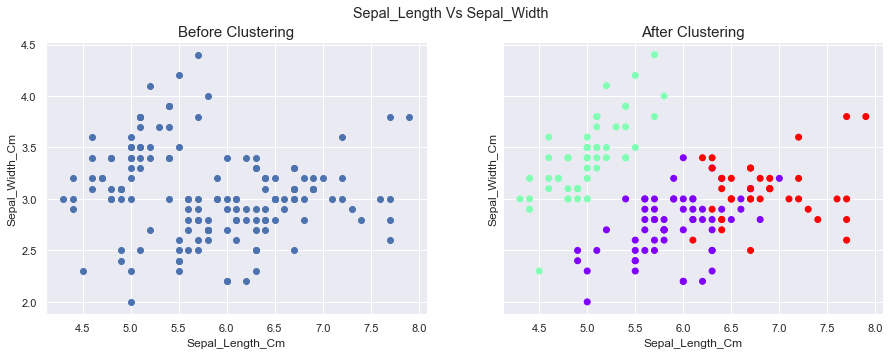

In [12]:
#Visualizing Sepal_Length Vs Sepal_Width 
f, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(15,5))
f.suptitle('Sepal_Length Vs Sepal_Width')

ax1.scatter(Data['SepalLengthCm'], Data['SepalWidthCm'])
ax1.set_title('Before Clustering', size=15)
ax1.set(xlabel='Sepal_Length_Cm', ylabel='Sepal_Width_Cm')

ax2.scatter(Data['SepalLengthCm'], Data['SepalWidthCm'], c=cluster_table['Cluster'], cmap='rainbow')
ax2.set_title('After Clustering', size=15)
ax2.set(xlabel='Sepal_Length_Cm', ylabel='Sepal_Width_Cm')


[Text(0.5, 0, 'Petal_Length_Cm'), Text(0, 0.5, 'Petal_Width_Cm')]

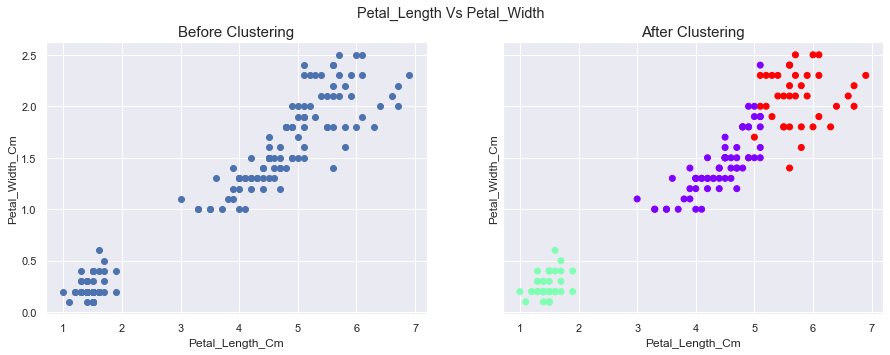

In [13]:
#Visualizing Sepal_Length Vs Sepal_Width 
f, (ax3, ax4) = plt.subplots(1, 2, sharey=True, figsize=(15,5))
f.suptitle('Petal_Length Vs Petal_Width')

ax3.scatter(Data['PetalLengthCm'], Data['PetalWidthCm'])
ax3.set_title('Before Clustering', size=15)
ax3.set(xlabel='Petal_Length_Cm', ylabel='Petal_Width_Cm')

ax4.scatter(Data['PetalLengthCm'], Data['PetalWidthCm'], c=cluster_table['Cluster'], cmap='rainbow')
ax4.set_title('After Clustering', size=15)
ax4.set(xlabel='Petal_Length_Cm', ylabel='Petal_Width_Cm')

# Thank You !